<a href="https://colab.research.google.com/github/Phuc-Homoji/Phuc-Homoji/blob/main/YourCelebLookALike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# liên kết Google drive với colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
# Tải thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator, image
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.models import load_model
from keras.models import  Sequential
from keras import regularizers
from keras.callbacks import EarlyStopping
from keras import layers

In [3]:
train_data = '/content/drive/MyDrive/AI/BaiTapCuoiKi_Celeb_VN/Train'
val_data  =  '/content/drive/MyDrive/AI/BaiTapCuoiKi_Celeb_VN/Validation'

In [4]:
from keras.engine.data_adapter import train_validation_split
#preprocessing
train_scale = ImageDataGenerator(rescale=1./255,
                                   rotation_range=0.2,
                                   width_shift_range=0.2,   
                                   height_shift_range=0.2,
                                   shear_range=0.3,
                                   zoom_range=0.5,
                                   horizontal_flip=True, 
                                   vertical_flip=True,
                                   validation_split=0.2)

train_input = train_scale.flow_from_directory(train_data,
                        target_size=(128, 128),
                        batch_size=64,
                        class_mode="categorical")

val_input = train_scale.flow_from_directory(val_data,
                        target_size=(128, 128),
                        batch_size=64,
                        class_mode="categorical")

Found 1904 images belonging to 49 classes.
Found 367 images belonging to 49 classes.


In [5]:
print("match class: ", train_input.class_indices)
print("Tổng cộng: ",train_input.num_classes)

match class:  {'1-Ribi Sachi Thuỷ': 0, '10-Quang Thắng': 1, '11-Vũ Cát Tường': 2, '12-Ánh Viên': 3, '13-NSUT Hồng Vân': 4, '14-Phạm Tuân': 5, '15-Misthy': 6, '16-Phạm Nhật Vượng': 7, '17-Vũ': 8, '18-Karik': 9, '19-Nhật Anh Trắng': 10, '2-Gino Tống': 11, '20-NSUT Tự Long': 12, '21-Sỹ Luân': 13, '22-MC Đại Nghĩa': 14, '23-Vinh Râu': 15, '24-Việt Hương': 16, '25-Trương Minh Quốc Thái': 17, '26-Sơn Tùng MTP': 18, '27-ViruSs': 19, '28-Nguyễn Thị Kim Ngân': 20, '29-Thái Vũ': 21, '3-Nguyễn Huy Hoàng': 22, '30-Chí Tài': 23, '31-Trường Giang': 24, '32-NSUT Thanh Điền': 25, '33-Huỳnh Phương': 26, '34-Lí Hải': 27, '35-Mạc Văn khoa': 28, '36-Phan Mạnh Quỳnh': 29, '37-Xuân Hinh': 30, '38-Minh Nhí': 31, '39-Quang Hải': 32, '4-Đàm Vĩnh Hưng': 33, '40-Trần Tiger': 34, '41-Nguyễn Tử Quảng': 35, '42-Lê Quang Liêm': 36, '43-Tiên Tiên': 37, '44-MC Lại Văn Sâm': 38, '45-Thành Lộc': 39, '46-Đen Vâu': 40, '47-Vân 

In [34]:
#MODEL CNN
model=Sequential()
#TRÍCH XUẤT TẬP DỮ LIỆU(FEATURE EXTRACTORS)
#LAYER 1
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same', input_shape=(128,128,3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
#LAYER 2
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
#LAYER 3
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

#FULLY CONNECTED LAYER
#Flatten Layer is used to change the dimension of output from convolution layer, which has 3D, to 2D output
model.add(Flatten())

#Dense(512) is a fully-connected layer with 128 hidden units
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(49,activation='softmax'))  
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 128, 128, 128)     3584      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 64, 64, 128)      0         
 g2D)                                                            
                                                                 
 dropout_38 (Dropout)        (None, 64, 64, 128)       0         
                                                                 
 conv2d_27 (Conv2D)          (None, 64, 64, 256)       295168    
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 32, 32, 256)      0         
 g2D)                                                            
                                                                 
 dropout_39 (Dropout)        (None, 32, 32, 256)      

In [35]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [36]:
from tensorflow.keras.callbacks import ModelCheckpoint
ckpoint_2 = ModelCheckpoint("Best_facecelb_model_val.h5",monitor="val_accuracy",save_best_only=True,mode="auto")

In [39]:
face_celeb_train = model.fit(train_input,batch_size=64,epochs=100,verbose=1,validation_data=val_input,callbacks=[ckpoint_2])

Epoch 1/100
30/30 [==============================] - 22s 722ms/step - loss: 0.8486 - accuracy: 0.7584 - val_loss: 4.9790 - val_accuracy: 0.3134
Epoch 2/100
30/30 [==============================] - 15s 489ms/step - loss: 0.7814 - accuracy: 0.7731 - val_loss: 4.9423 - val_accuracy: 0.3324
Epoch 3/100
30/30 [==============================] - 15s 490ms/step - loss: 0.8113 - accuracy: 0.7742 - val_loss: 5.2202 - val_accuracy: 0.3106
Epoch 4/100
30/30 [==============================] - 15s 495ms/step - loss: 0.8612 - accuracy: 0.7563 - val_loss: 4.6444 - val_accuracy: 0.3052
Epoch 5/100
30/30 [==============================] - 15s 508ms/step - loss: 0.8618 - accuracy: 0.7616 - val_loss: 4.7694 - val_accuracy: 0.3025
Epoch 6/100
30/30 [==============================] - 16s 503ms/step - loss: 0.7760 - accuracy: 0.7731 - val_loss: 5.0293 - val_accuracy: 0.3324
Epoch 7/100
30/30 [==============================] - 15s 489ms/step - loss: 0.8378 - accuracy: 0.7710 - val_loss: 4.7853 - val_accuracy:

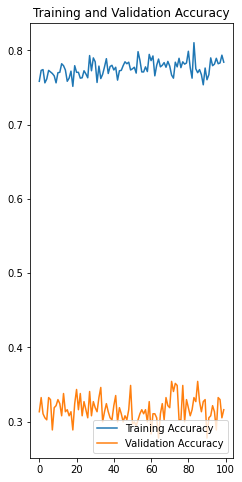

In [40]:
acc = face_celeb_train.history['accuracy']
val_acc = face_celeb_train.history['val_accuracy']

loss = face_celeb_train.history['loss']
val_loss = face_celeb_train.history['val_loss']
epochs_range=range(100)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()